# FKM Nonlinear example
## Plot a load-lifetime woehler curve with several calls to the FKM nonlinear algorithm

#### Python module imports

In [1]:
# standard modules
import pandas as pd
import numpy as np
import itertools
import timeit
import matplotlib.pyplot as plt
import matplotlib.patches

# pylife
import pylife
import pylife.strength
import pylife.strength.fkm_nonlinear
import pylife.mesh.gradient

## Collect all input data

In [4]:
# define function for one FKM assessment
def get_lifetime(load):
    load_sequence = pd.Series([load, 0])  # [N]
    
    assessment_parameters = pd.Series({
            'MatGroupFKM': 'Steel',  # [Steel, SteelCast, Al_wrought] material group
            'R_m':  400,  #907,           # [MPa] ultimate tensile strength (de: Zugfestigkeit)
            #'K_RP': 1,             # [-] surface roughness factor, set to 1 for polished surfaces or determine from the diagrams below
            'R_z': 250,  #0,             # [um] average roughness (de: mittlere Rauheit), only required if K_RP is not specified directly

            'P_A': 0.5,            # [-] (one of [0.5, 2.3e-1, 1e-3, 7.2e-5, 1e-5], failure probability (de: auszulegende Ausfallwahrscheinlichkeit)
            # beta: 0.5,           # damage index, specify this as an alternative to P_A

            'P_L': 50,             # [%] (one of 2.5%, 50%) (de: Auftretenswahrscheinlilchkeit der Lastfolge)
            'c':   1.4,              # [MPa/N] (de: Übertragungsfaktor Vergleichsspannung zu Referenzlast im Nachweispunkt, c = sigma_I / L_REF)
            'A_sigma': 339.4,  # 25,         # [mm^2] (de: Hochbeanspruchte Oberfläche des Bauteils)
            'A_ref': 500,          # [mm^2] (de: Hochbeanspruchte Oberfläche eines Referenzvolumens), usually set to 500
            'G': 2/15, #0.44,             # [mm^-1] (de: bezogener Spannungsgradient)
            's_L': 10, # 0,              # [MPa] standard deviation of Gaussian distribution
            'K_p': 3.5, #2.76,           # [-] (de: Traglastformzahl) K_p = F_plastic / F_yield (3.1.1)
    })


    result = pylife.strength.fkm_nonlinear.assessment_nonlinear_standard.perform_fkm_nonlinear_assessment(assessment_parameters, load_sequence, 
                                                                            calculate_P_RAM=True, calculate_P_RAJ=True)

    print(result["P_RAM_stddev_log_N"], result["P_RAJ_stddev_log_N"])
    
    # get lifetime for P_RAM
    n_ram = result['P_RAM_lifetime_n_cycles']
    if result['P_RAM_is_life_infinite']:
        n_ram = 1e7
        
        
    # get lifetime for P_RAJ
    n_raj = result['P_RAJ_lifetime_n_cycles']
    if result['P_RAJ_is_life_infinite']:
        n_raj = 1e7
        
    # get damage parameter values
    p_ram = result['P_RAM_collective']["P_RAM"].values[0]
    p_raj = result['P_RAJ_collective']["P_RAJ"].values[0]
    
    # get scatter
    one_over_tn_ram = result['P_RAM_1/T_N']
    one_over_tn_raj = result['P_RAJ_1/T_N']
    
    return n_ram, n_raj, p_ram, p_raj, one_over_tn_ram, one_over_tn_raj
    

#### Compute woehler curve

In [5]:
#%%script false --no-raise-error

load_list = np.exp(np.linspace(np.log(100), np.log(5e3), 10))
print(f"load values: {load_list}")

df_result = pd.DataFrame(index=pd.Index(load_list, name="load"))

# loop over different load values
for load in load_list:
    
    # perform the FKM nonlinear assessment
    n_ram, n_raj, p_ram, p_raj, one_over_tn_ram, one_over_tn_raj = get_lifetime(load)

    # store the results
    df_result.loc[load, "n_ram"] = n_ram
    df_result.loc[load, "p_ram"] = p_ram
    df_result.loc[load, "one_over_tn_ram"] = one_over_tn_ram
    df_result.loc[load, "n_raj"] = n_raj
    df_result.loc[load, "p_raj"] = p_raj
    df_result.loc[load, "one_over_tn_raj"] = one_over_tn_raj

load values: [ 100.          154.44521049  238.53323045  368.40314986  568.98102028
  878.76393444 1357.2088083  2096.14400083 3237.39401435 5000.        ]
P_RAM_max: 
72.57679722607583
fatigue_strength_limit: 
187.4273972241359


D:\pylife\_venv\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


Seeger-Beste stress computation: 2.50 % of 200 variables diverged
0.31218274111675126 0.12936507936507935
P_RAM_max: 
111.32134069069943
fatigue_strength_limit: 
187.4273972241359


D:\pylife\_venv\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


Seeger-Beste stress computation: 1.50 % of 200 variables diverged
0.31218274111675126 0.12936507936507935
P_RAM_max: 
170.57570503026994
fatigue_strength_limit: 
187.4273972241359


D:\pylife\_venv\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


Seeger-Beste stress computation: 0.50 % of 200 variables diverged
0.31218274111675126 0.12936507936507935
P_RAM_max: 
263.0608041475433
fatigue_strength_limit: 
187.4273972241359
0.31218274111675126 0.12936507936507935
P_RAM_max: 
414.8208668691966
fatigue_strength_limit: 
187.4273972241359
0.31218274111675126 0.12936507936507935
P_RAM_max: 
721.5972331761396
fatigue_strength_limit: 
187.4273972241359
0.20364238410596028 0.12936507936507935
P_RAM_max: 
1707.949550456192
fatigue_strength_limit: 
187.4273972241359
0.20364238410596028 0.12936507936507935
P_RAM_max: 
5767.228997682419
fatigue_strength_limit: 
187.4273972241359
0.0 0.12936507936507935
P_RAM_max: 
22236.0548542132
fatigue_strength_limit: 
187.4273972241359


d:\pylife\src\pylife\strength\fkm_nonlinear\damage_calculator.py:520: RuntimeWarning: invalid value encountered in power
  nominator = np.power(self._assessment_parameters.a_0, 1-m) - np.power(bracket, 1-m)


0.0 0.12936507936507935
P_RAM_max: 
87932.14701937561
fatigue_strength_limit: 
187.4273972241359


d:\pylife\src\pylife\strength\fkm_nonlinear\damage_calculator.py:520: RuntimeWarning: invalid value encountered in power
  nominator = np.power(self._assessment_parameters.a_0, 1-m) - np.power(bracket, 1-m)


0.0 0.12936507936507935


In [6]:
df_result

,n_ram,p_ram,one_over_tn_ram,n_raj,p_raj,one_over_tn_raj
load,,,,,,
100.000000,1.000000e+07,72.576797,6.311848,1.000000e+07,0.003894,2.145735
154.445210,1.000000e+07,111.321341,6.311848,1.000000e+07,0.032084,2.145735
238.533230,1.000000e+07,170.575705,6.311848,1.000000e+07,0.181053,2.145735
368.403150,7.870107e+04,263.060804,6.311848,8.855856e+04,0.905277,2.145735
568.981020,7.797355e+03,414.820867,6.311848,8.617553e+03,3.933652,2.145735
878.763934,6.114595e+02,721.597233,3.326262,8.787201e+02,16.632033,2.145735
1357.208808,3.620867e+01,1707.949550,3.326262,4.778948e+01,106.428861,2.145735
2096.144001,0.000000e+00,5767.228998,1.000000,6.532681e+00,393.816544,2.145735
3237.394014,0.000000e+00,22236.054854,1.000000,0.000000e+00,19180.737599,2.145735


Text(0, 0.5, 'Load L_o [N]')

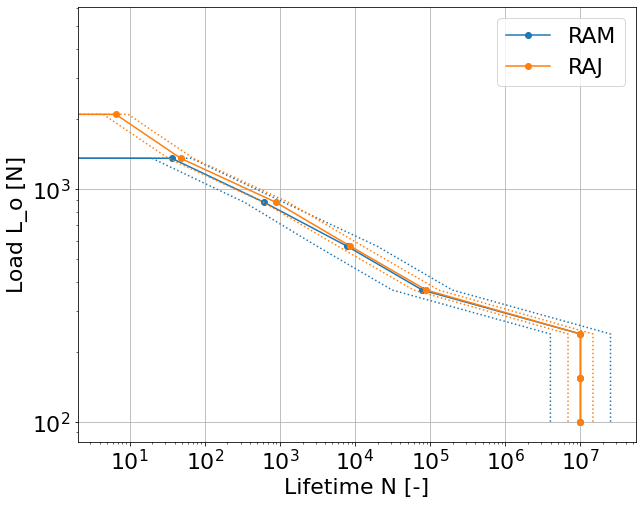

In [7]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

# woehler curve for P_RAM
p = plt.plot(df_result.n_ram, df_result.index, 'o-', label="RAM")
plt.plot(df_result.n_ram / np.sqrt(df_result.one_over_tn_ram), df_result.index, ':', color=p[0].get_color())
plt.plot(df_result.n_ram * np.sqrt(df_result.one_over_tn_ram), df_result.index, ':', color=p[0].get_color())

# woehler curve for P_RAJ
p = plt.plot(df_result.n_raj, df_result.index, 'o-', label="RAJ")
plt.plot(df_result.n_raj / np.sqrt(df_result.one_over_tn_raj), df_result.index, ':', color=p[0].get_color())
plt.plot(df_result.n_raj * np.sqrt(df_result.one_over_tn_raj), df_result.index, ':', color=p[0].get_color())

plt.grid()
plt.legend()
plt.loglog()
plt.xlabel("Lifetime N [-]")
plt.ylabel("Load L_o [N]")